Планирование рекламной кампании в интернет-магазине "Стримчик"

В данном проекте нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании на основе данных до 2016 года. Представим, что мы планируем кампанию на 2017-й.  
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».


Описание данных:

Name — название игры

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы долларов)

EU_sales — продажи в Европе (миллионы долларов)

JP_sales — продажи в Японии (миллионы долларов)

Other_sales — продажи в других странах (миллионы долларов)

Critic_Score — оценка критиков (максимум 100)

User_Score — оценка пользователей (максимум 10)

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

# Шаг 1. Откроем файл с данными и изучим общую информацию

In [250]:
import pandas as pd #импорт необходимых библиотек
import matplotlib.pyplot as plt #импортируем библиотеку для построения графика
import numpy as np
from functools import reduce
from scipy import stats as st
import seaborn as sns

In [251]:
data=pd.read_csv('/datasets/games.csv')  #прочитаем файл 
data.info() # изучим общую информацию по дата фрейму
data.head(100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
95,Crash Bandicoot 2: Cortex Strikes Back,PS,1997.0,Platform,3.78,2.17,1.31,0.31,NaN,NaN,NaN
96,Super Smash Bros. for Wii U and 3DS,3DS,2014.0,Fighting,3.27,1.37,2.43,0.48,NaN,NaN,NaN
97,Super Mario Galaxy 2,Wii,2010.0,Platform,3.56,2.35,0.98,0.62,97.0,9.1,E
98,Super Mario Bros. 2,NES,1988.0,Platform,5.39,1.18,0.70,0.19,NaN,NaN,NaN


Выгрузили 16715 строк, отметим присутствие большого количества пропусков, неверные типы данных.

# Шаг 2. Подготовим данные

In [252]:
data.columns = data.columns.str.lower() #Заменим названия столбцов, приведем к нижнему регистру
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [253]:
#изучим срез датафрема по наличию NAN в столбце год выпуска
nan=data.query('year_of_release=="NaN"')
print(len(nan)/len(data)) #2 процента можно и удалить. точно заполнить не получится, если только медианой по платформе
data.dropna(subset=['year_of_release'], inplace=True) #удалим пустые строки в столбце год выпуска
#Преобразуем данные в нужные типы
data['year_of_release']=data['year_of_release'].astype(int)

0.01609332934489979


In [254]:
#заменим NaN в столбце с рейтингом на -1, чтобы это значение выделялось в общем списке значений
data['rating']=data['rating'].fillna(-1)

In [255]:
#изучим уникальные значения в столбцах
print(data['critic_score'].unique())
print(data['user_score'].unique()) 
print(data['rating'].unique()) 

[76. nan 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44. 55. 48. 57. 29. 47. 65. 54.
 20. 53. 37. 38. 33. 52. 30. 32. 43. 45. 51. 40. 46. 39. 34. 41. 36. 31.
 27. 35. 26. 19. 28. 23. 24. 21. 17. 13.]
['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']
['E' -1 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


In [256]:
data['user_score'] = data['user_score'].replace('tbd', 0) #заменим значение 0, а потом не будем включать его в анализ корреляции
data['user_score'] = data['user_score'].fillna(0) #остальные пропуски заменим на 0, так как некорректно заменять на медиану по жанру или по платформе
data['critic_score'] = data['critic_score'].fillna(0)
data['user_score']=pd.to_numeric(data['user_score'], errors='coerce')
data['critic_score']=pd.to_numeric(data['critic_score'], errors='coerce')

In [257]:
data['user_score']=data['user_score'].astype(int)
data['critic_score']=data['critic_score'].astype(int) #не понимаю, почему но только после 2х методов critic_score и user_score становятся int 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16446 non-null object
year_of_release    16446 non-null int64
genre              16444 non-null object
na_sales           16446 non-null float64
eu_sales           16446 non-null float64
jp_sales           16446 non-null float64
other_sales        16446 non-null float64
critic_score       16446 non-null int64
user_score         16446 non-null int64
rating             16446 non-null object
dtypes: float64(4), int64(3), object(4)
memory usage: 1.5+ MB


# Вывод:
Значение 'tbd' в стобце 'user_score' переводится как to be determined, то есть данных пока не достаточно для присвоения рейтинга игре. Заменим на 0. А потом поменяем тип данных в этом столбце, а все Nan заменим на 0. С критиками то же самое. Заменяем на о, так как не корректно присваивать медианное значение по жанру или платформе.
В столбце рейтинг заменим NaN на -1, чтобы это значение выделялось в общем списке значений.

In [258]:
#Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец
data['total_rev']=data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales']
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 12 columns):
name               16444 non-null object
platform           16446 non-null object
year_of_release    16446 non-null int64
genre              16444 non-null object
na_sales           16446 non-null float64
eu_sales           16446 non-null float64
jp_sales           16446 non-null float64
other_sales        16446 non-null float64
critic_score       16446 non-null int64
user_score         16446 non-null int64
rating             16446 non-null object
total_rev          16446 non-null float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.6+ MB


# Шаг 3. Проведем исследовательский анализ данных

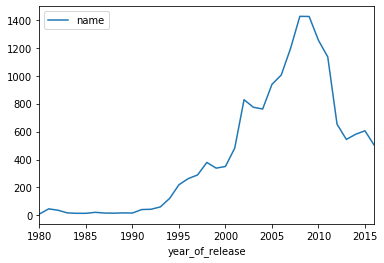

In [259]:
pivot=data.pivot_table(index=('year_of_release'), values=('name'), aggfunc="count") 
#Посмотрим, сколько игр выпускалось в разные годы. 
pivot.plot()

по графику можно сделать вывод о том, что до 2000 года выпускалось до 400 игр в год, с 2000 года по 2015 выпускалось от 400 до 1400 игр в год. 

In [260]:
pivot_platform_year=data.pivot_table(index=("platform",'year_of_release'), values=('total_rev'), aggfunc="sum") 
#Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
pivot_platform_year=pivot_platform_year.reset_index() # 
pivot_platform_year

,platform,year_of_release,total_rev
0,2600,1980,11.38
1,2600,1981,35.68
2,2600,1982,28.88
3,2600,1983,5.84
4,2600,1984,0.27
...,...,...,...
233,XB,2008,0.18
234,XOne,2013,18.96
235,XOne,2014,54.07
236,XOne,2015,60.14


In [261]:
year_of_release_top20=pivot_platform_year['year_of_release'].nunique() #посчитаем уникальные значения в столбце с годом выпуска
print("Данные для анализа представлены за", year_of_release_top20,"лет")

Данные для анализа представлены за 37 лет


In [262]:
platform_rev=data.pivot_table(index=("platform"), values=('total_rev'), aggfunc="sum") 
#Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. 
platform_rev=platform_rev.sort_values(by='total_rev', ascending=False)
platform_rev.reset_index()

,platform,total_rev
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


In [263]:
#возьмем 20 топ платформ по продажам и построим для них графики по выловой выручке
top20_rev=platform_rev.query('total_rev>82')
top20_rev=top20_rev.reset_index()
top20_rev

,platform,total_rev
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


In [264]:
top_20_unique_platforms=top20_rev['platform'].unique() #найдем уникальные названия 20 топ платформ

График для платформы PS2


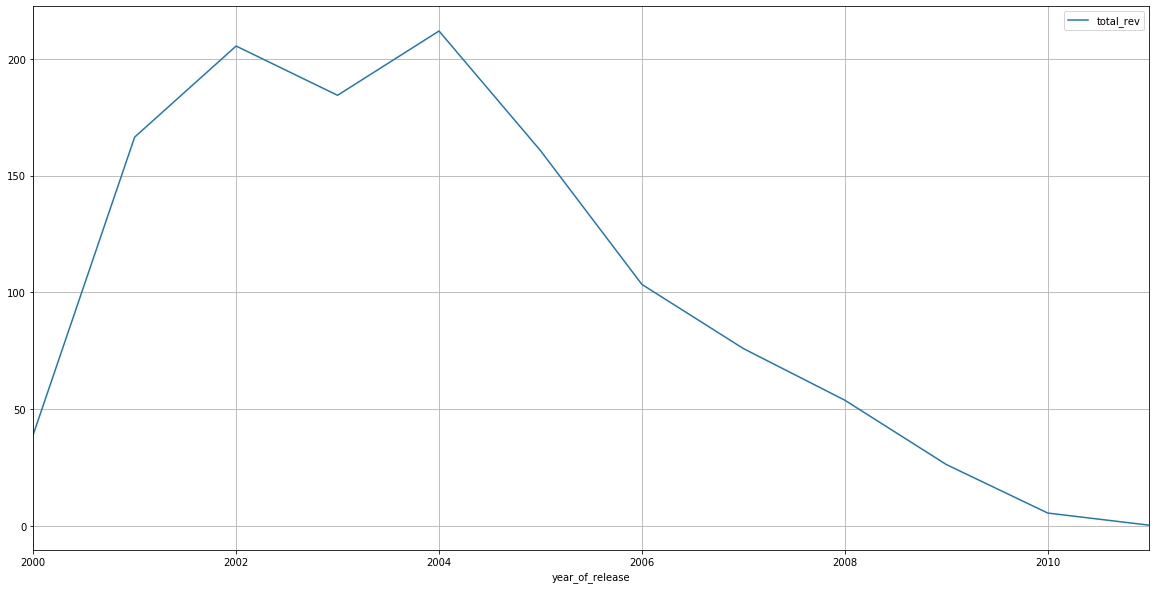

График для платформы X360


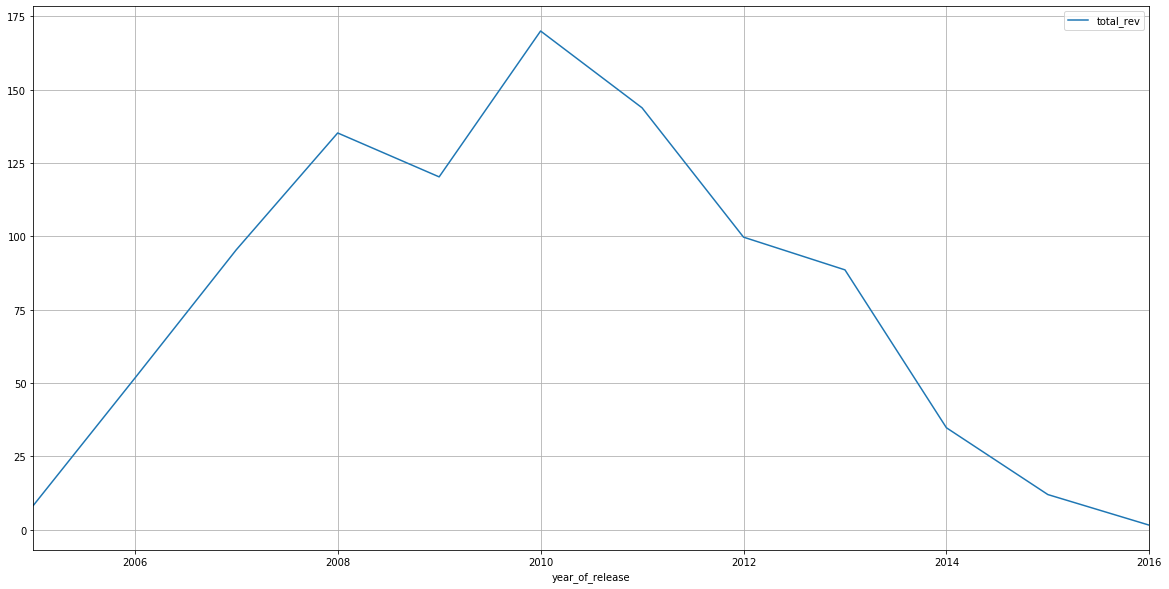

График для платформы PS3


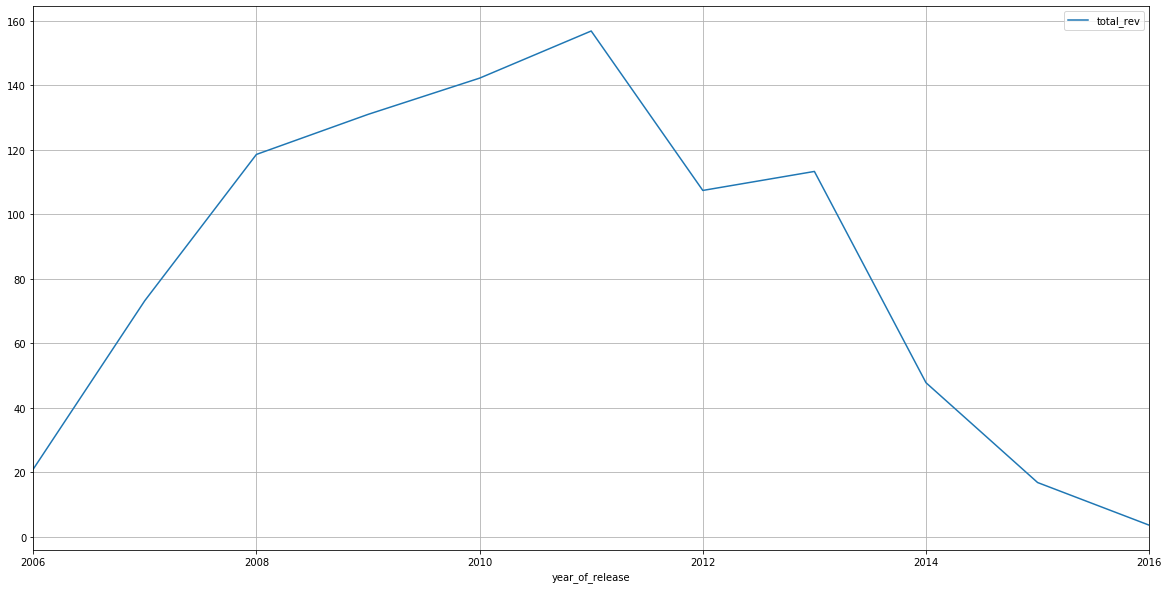

График для платформы Wii


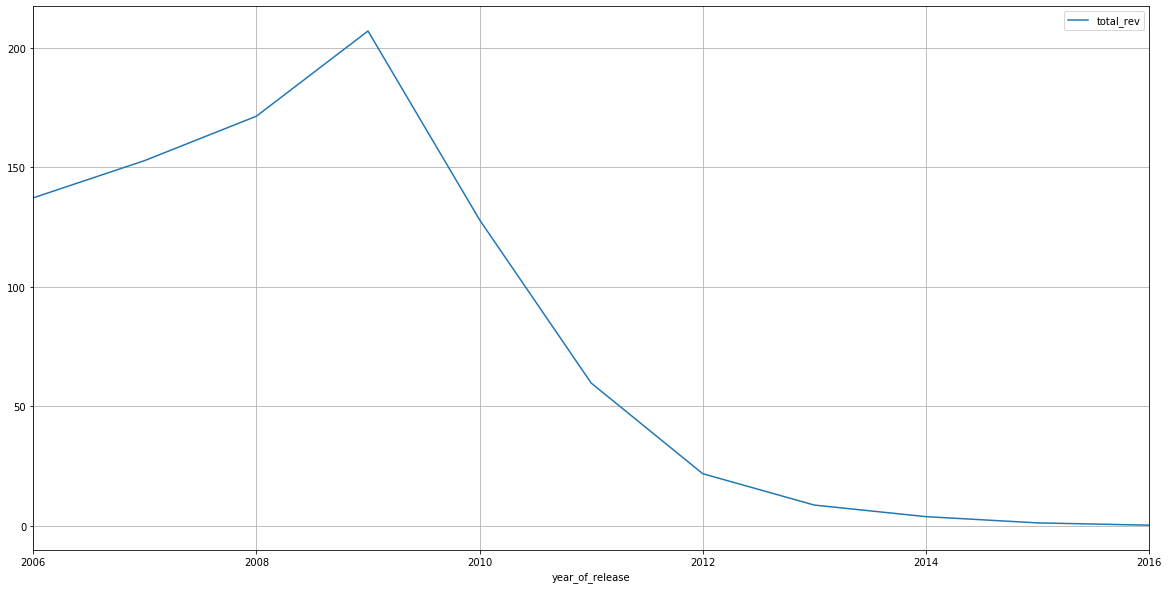

График для платформы DS


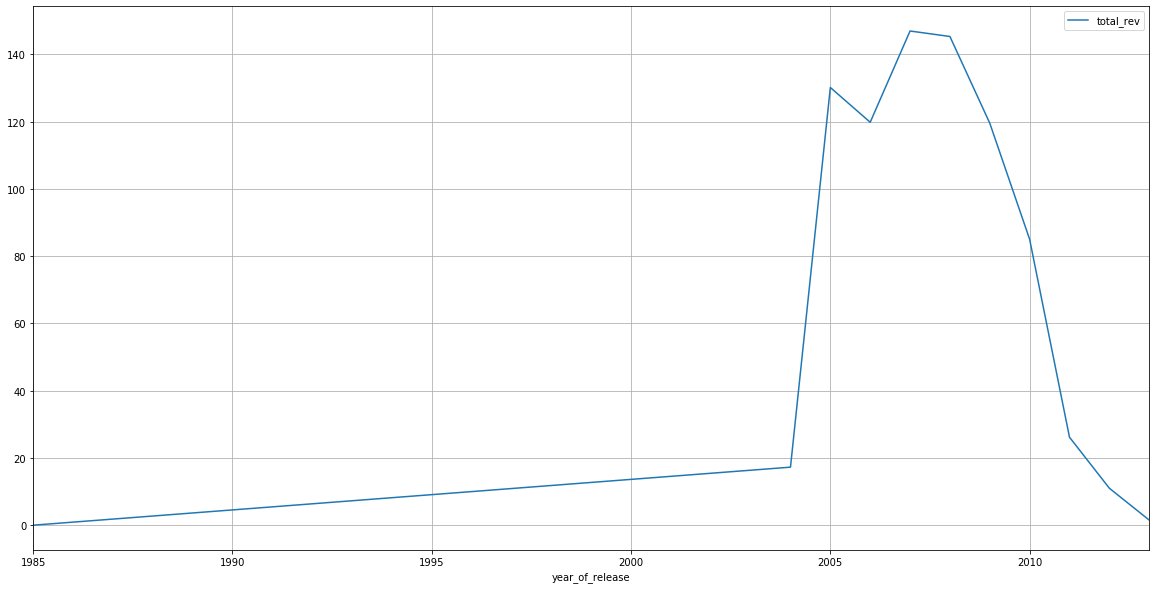

График для платформы PS


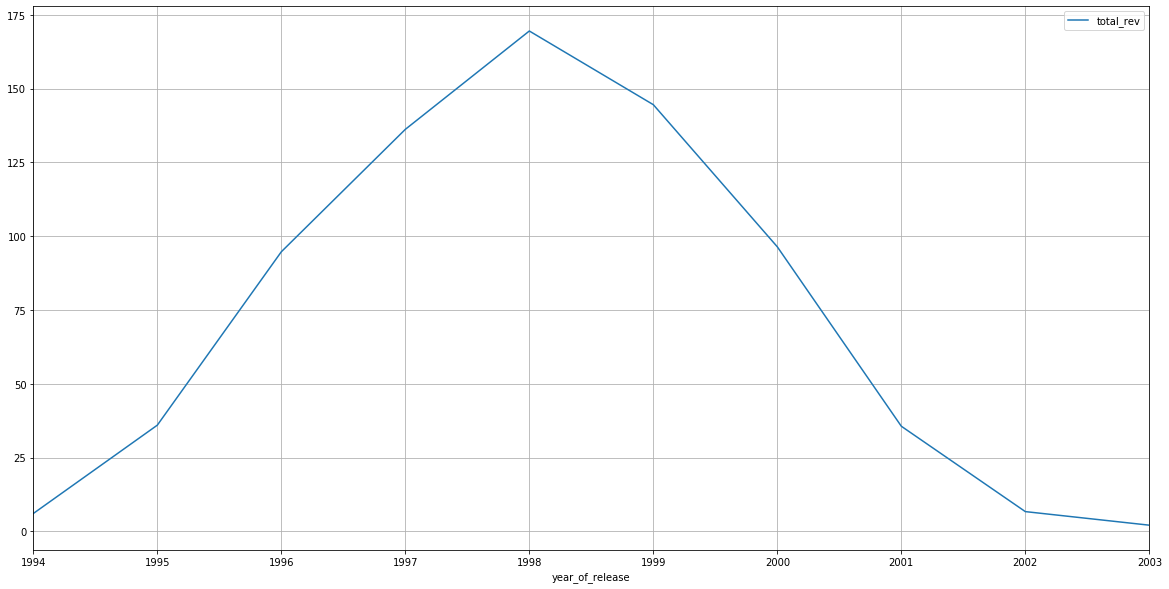

График для платформы PS4


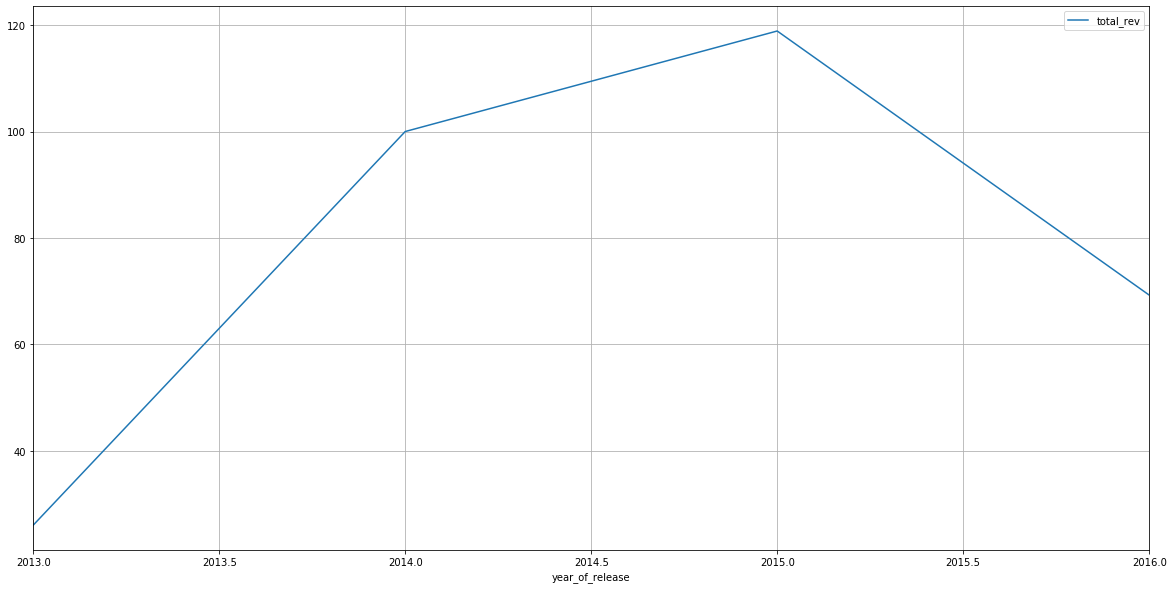

График для платформы GBA


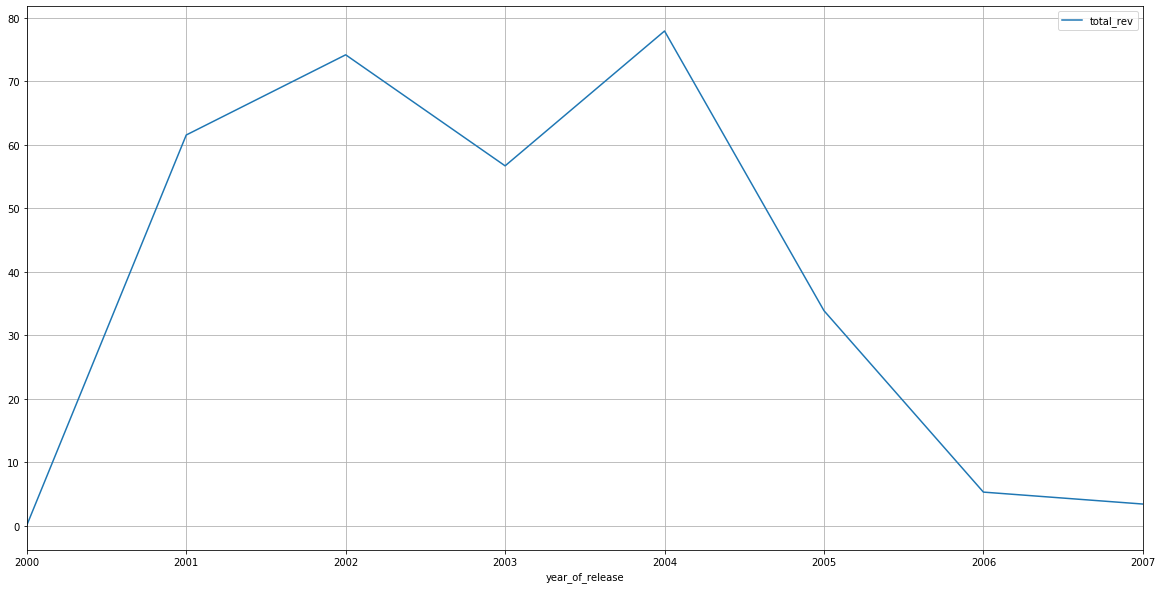

График для платформы PSP


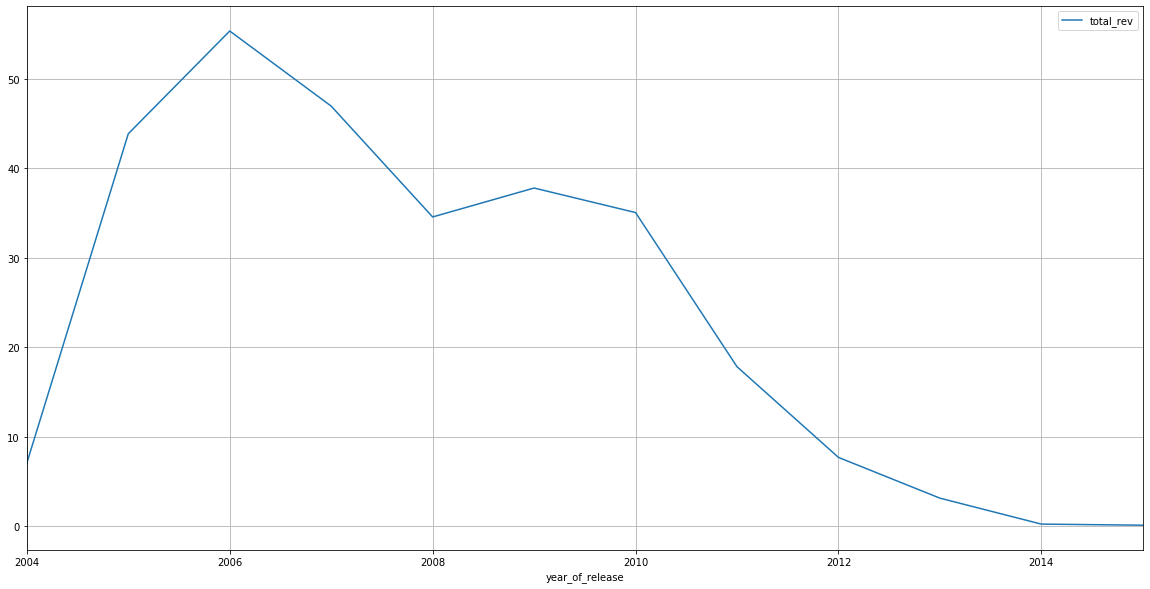

График для платформы 3DS


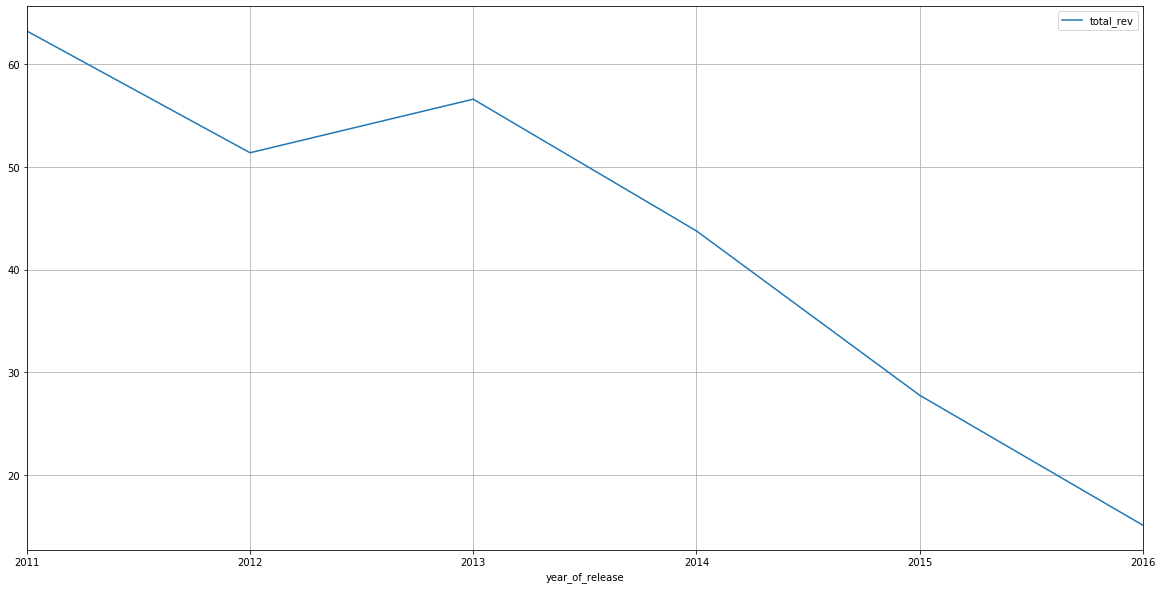

График для платформы PC


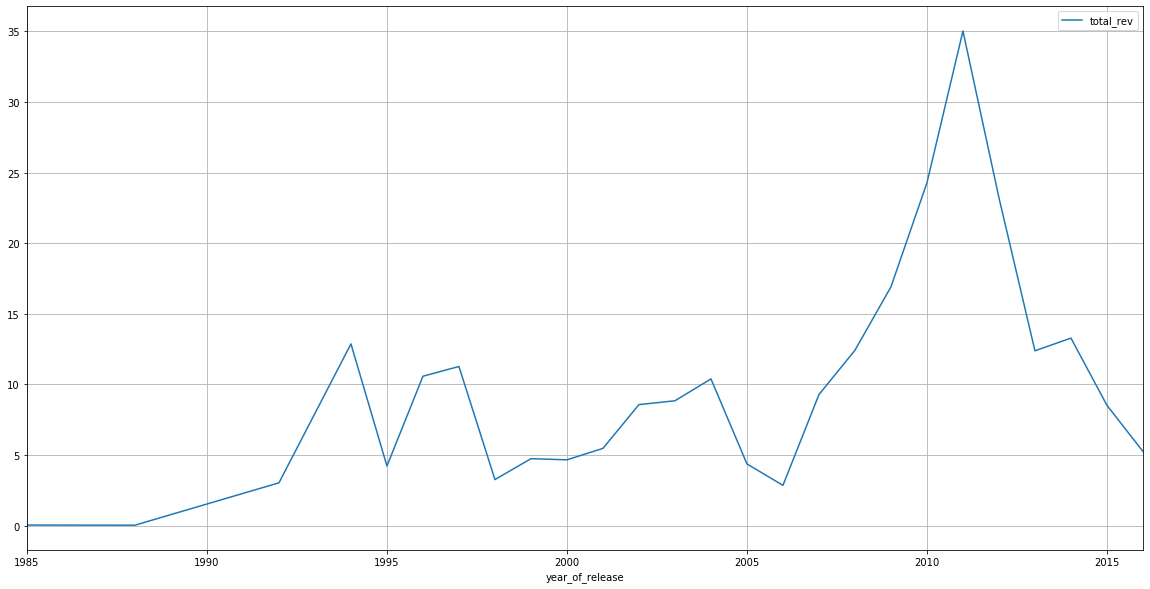

График для платформы GB


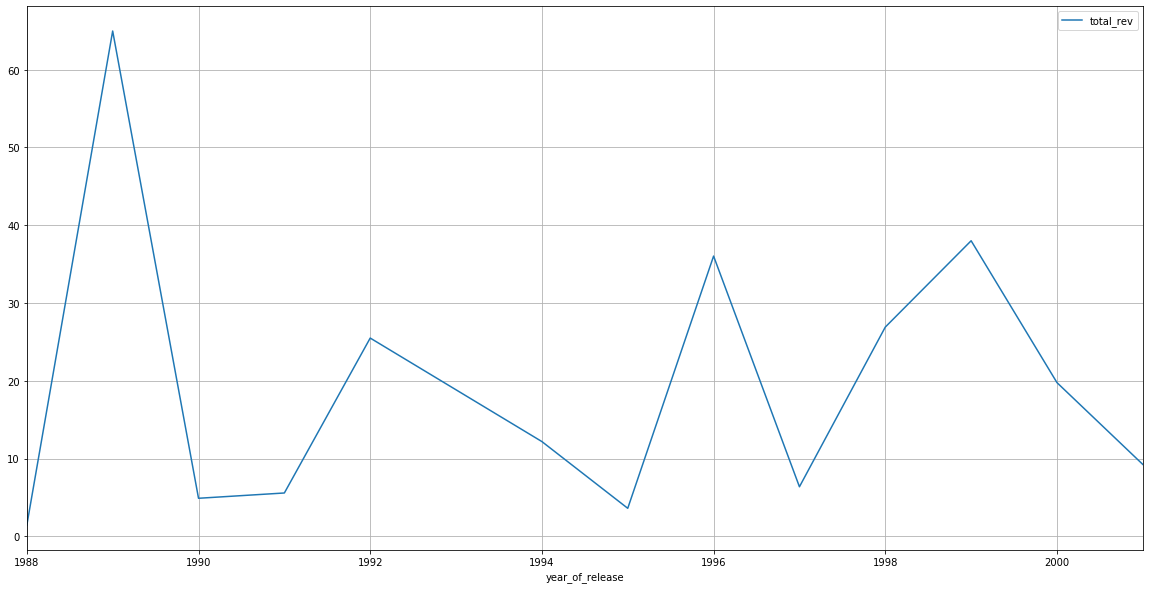

График для платформы XB


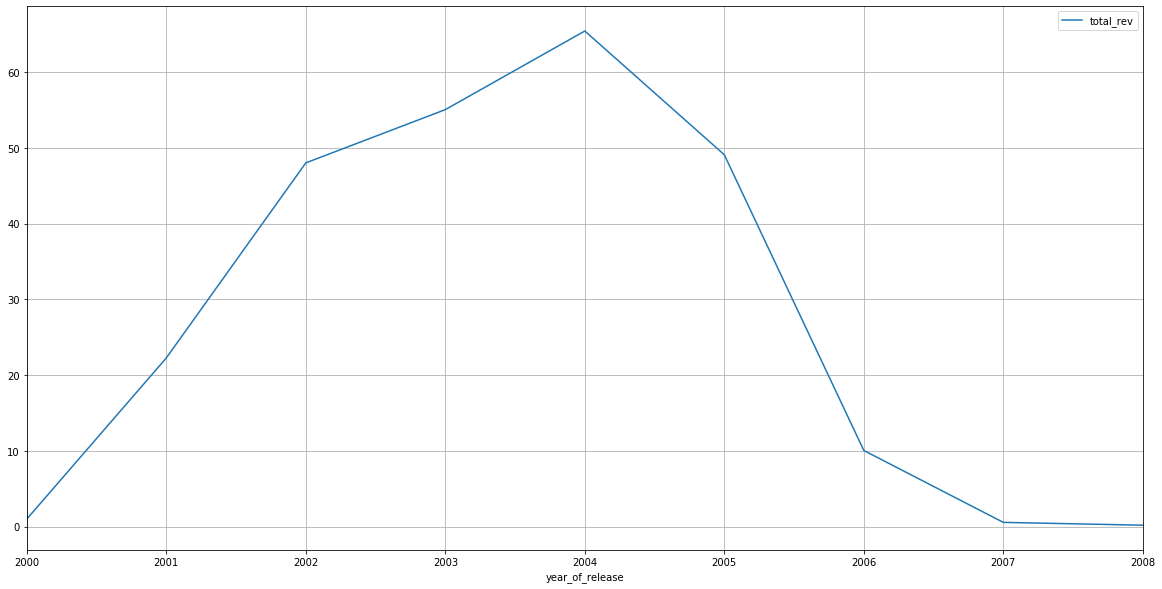

График для платформы NES


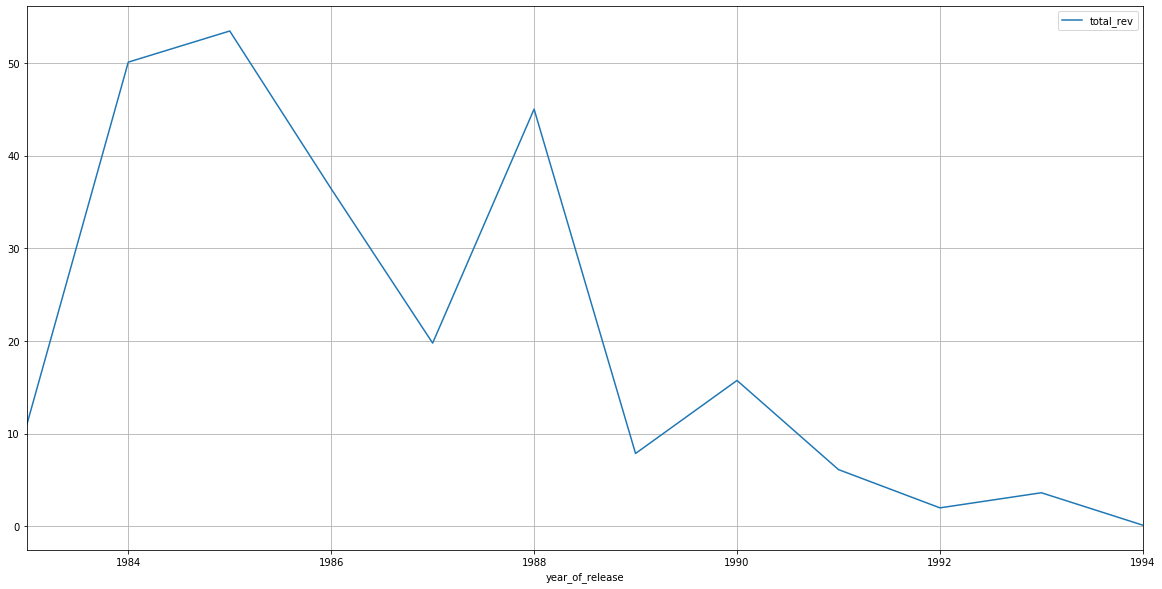

График для платформы N64


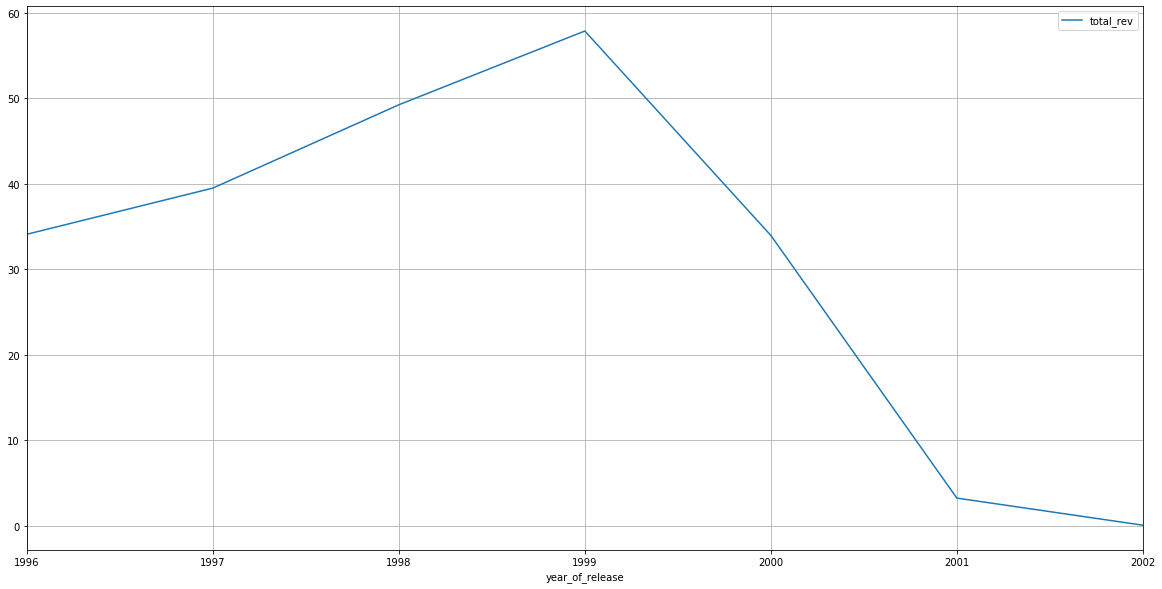

График для платформы SNES


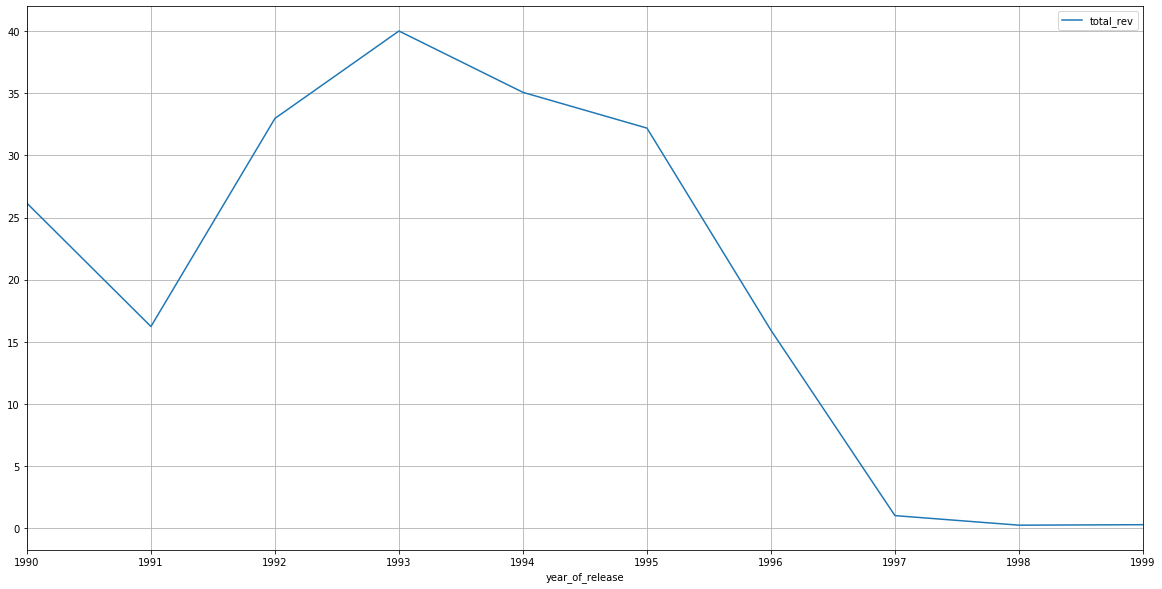

График для платформы GC


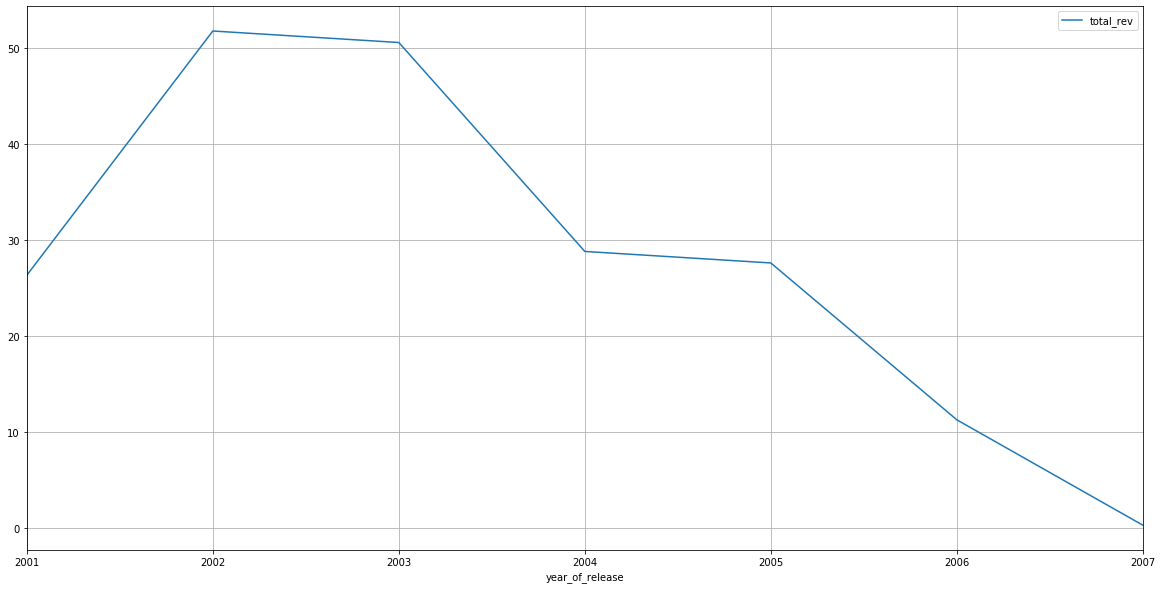

График для платформы XOne


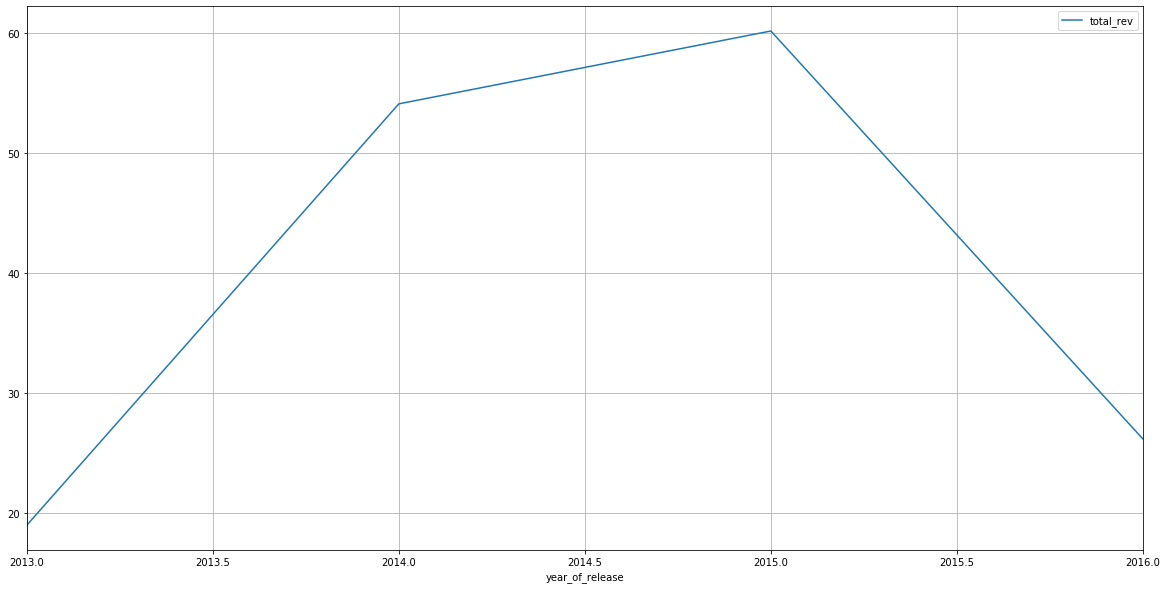

График для платформы 2600


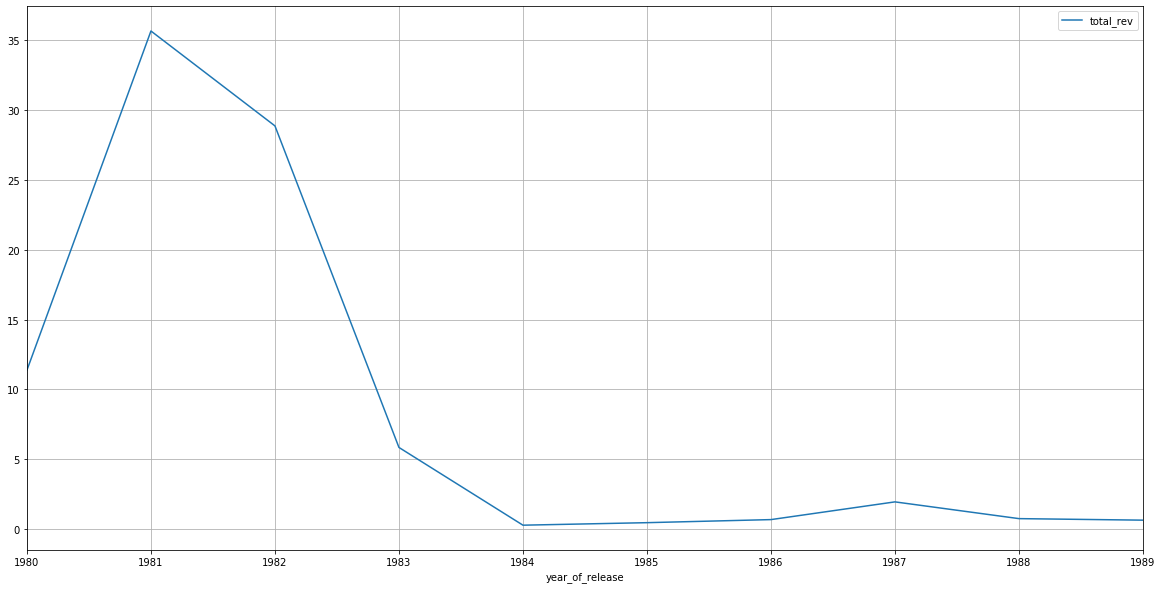

График для платформы WiiU


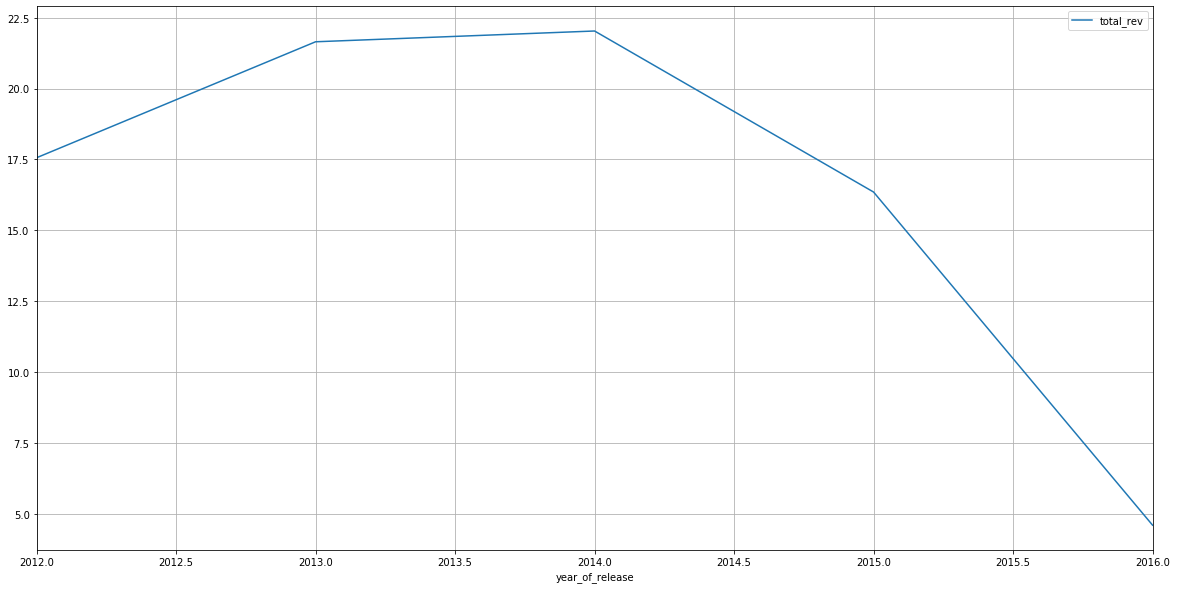

In [265]:
for i in top_20_unique_platforms:
    print("График для платформы",i)
    j=pivot_platform_year.query('platform==@i')
    ax = plt.gca()
    j.plot(x='year_of_release', y='total_rev', grid=True, figsize=(20,10), ax=ax)
    plt.show()


In [266]:
years_for_platform=pd.DataFrame(columns=["platform",'years'])
for i in top_20_unique_platforms:
    for j in top_20_unique_platforms:
        j=pivot_platform_year.query('platform==@i')
        years_for_platform.loc[i]=[i, j['year_of_release'].nunique()]  

In [267]:
years_for_platform=years_for_platform.reset_index(drop=True)
years_for_platform

,platform,years
0,PS2,12
1,X360,12
2,PS3,11
3,Wii,11
4,DS,11
5,PS,10
6,PS4,4
7,GBA,8
8,PSP,12
9,3DS,6


In [268]:
print("Количество лет существования платформы в среднем:", years_for_platform['years'].mean())

Количество лет существования платформы в среднем: 10.0


# Вывод: 

Максимальная выручка у платформ: PS2 1233.56, X360	961.24, PS3	931.34, Wii	891.18, DS	802.78, PS 727.58. Но не все из них актуальные, выручка у некоторых платформ максимальная, но эти платформы остались уже в прошлом.
Платформы X360, PS3, Wii, PS4, PSP, 3DS, PC, XOne, WiiU актуальны и имеют выручки в 2010-2016 годах. К потенциально прибыльным платформам отнесем:X360, Wii, PS4,3DS, PC, XOne, WiiU. 
по данному графику можно сказать, что жизненный цикл одной игры составляет в среднем 10 лет. за актульный срок для анализа возьмем данные по платформам с 2010 года.
Жизненый цикл PS3 на исходе, поэтому не включаем его в список дальнейшего исследования.

In [269]:
platforms=['X360','Wii','PS4','3DS','PC','XOne','WiiU'] 
#Выберем несколько потенциально прибыльных платформ

In [270]:
good_data=data.query('platform in @platforms and year_of_release>2010') #сделаем срез по датафрейму по платформам и по данным с 2010
good_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_rev
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88,3,M,14.73
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0,0,-1,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,0,0,-1,14.60
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83,4,M,13.68
...,...,...,...,...,...,...,...,...,...,...,...,...
16678,End of Nations,PC,2012,Strategy,0.01,0.00,0.00,0.00,0,0,T,0.01
16688,Outdoors Unleashed: Africa 3D,3DS,2011,Sports,0.01,0.00,0.00,0.00,0,0,T,0.01
16692,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,0.00,0.01,0.00,0.00,80,7,M,0.01
16696,Breach,PC,2011,Shooter,0.01,0.00,0.00,0.00,61,5,T,0.01


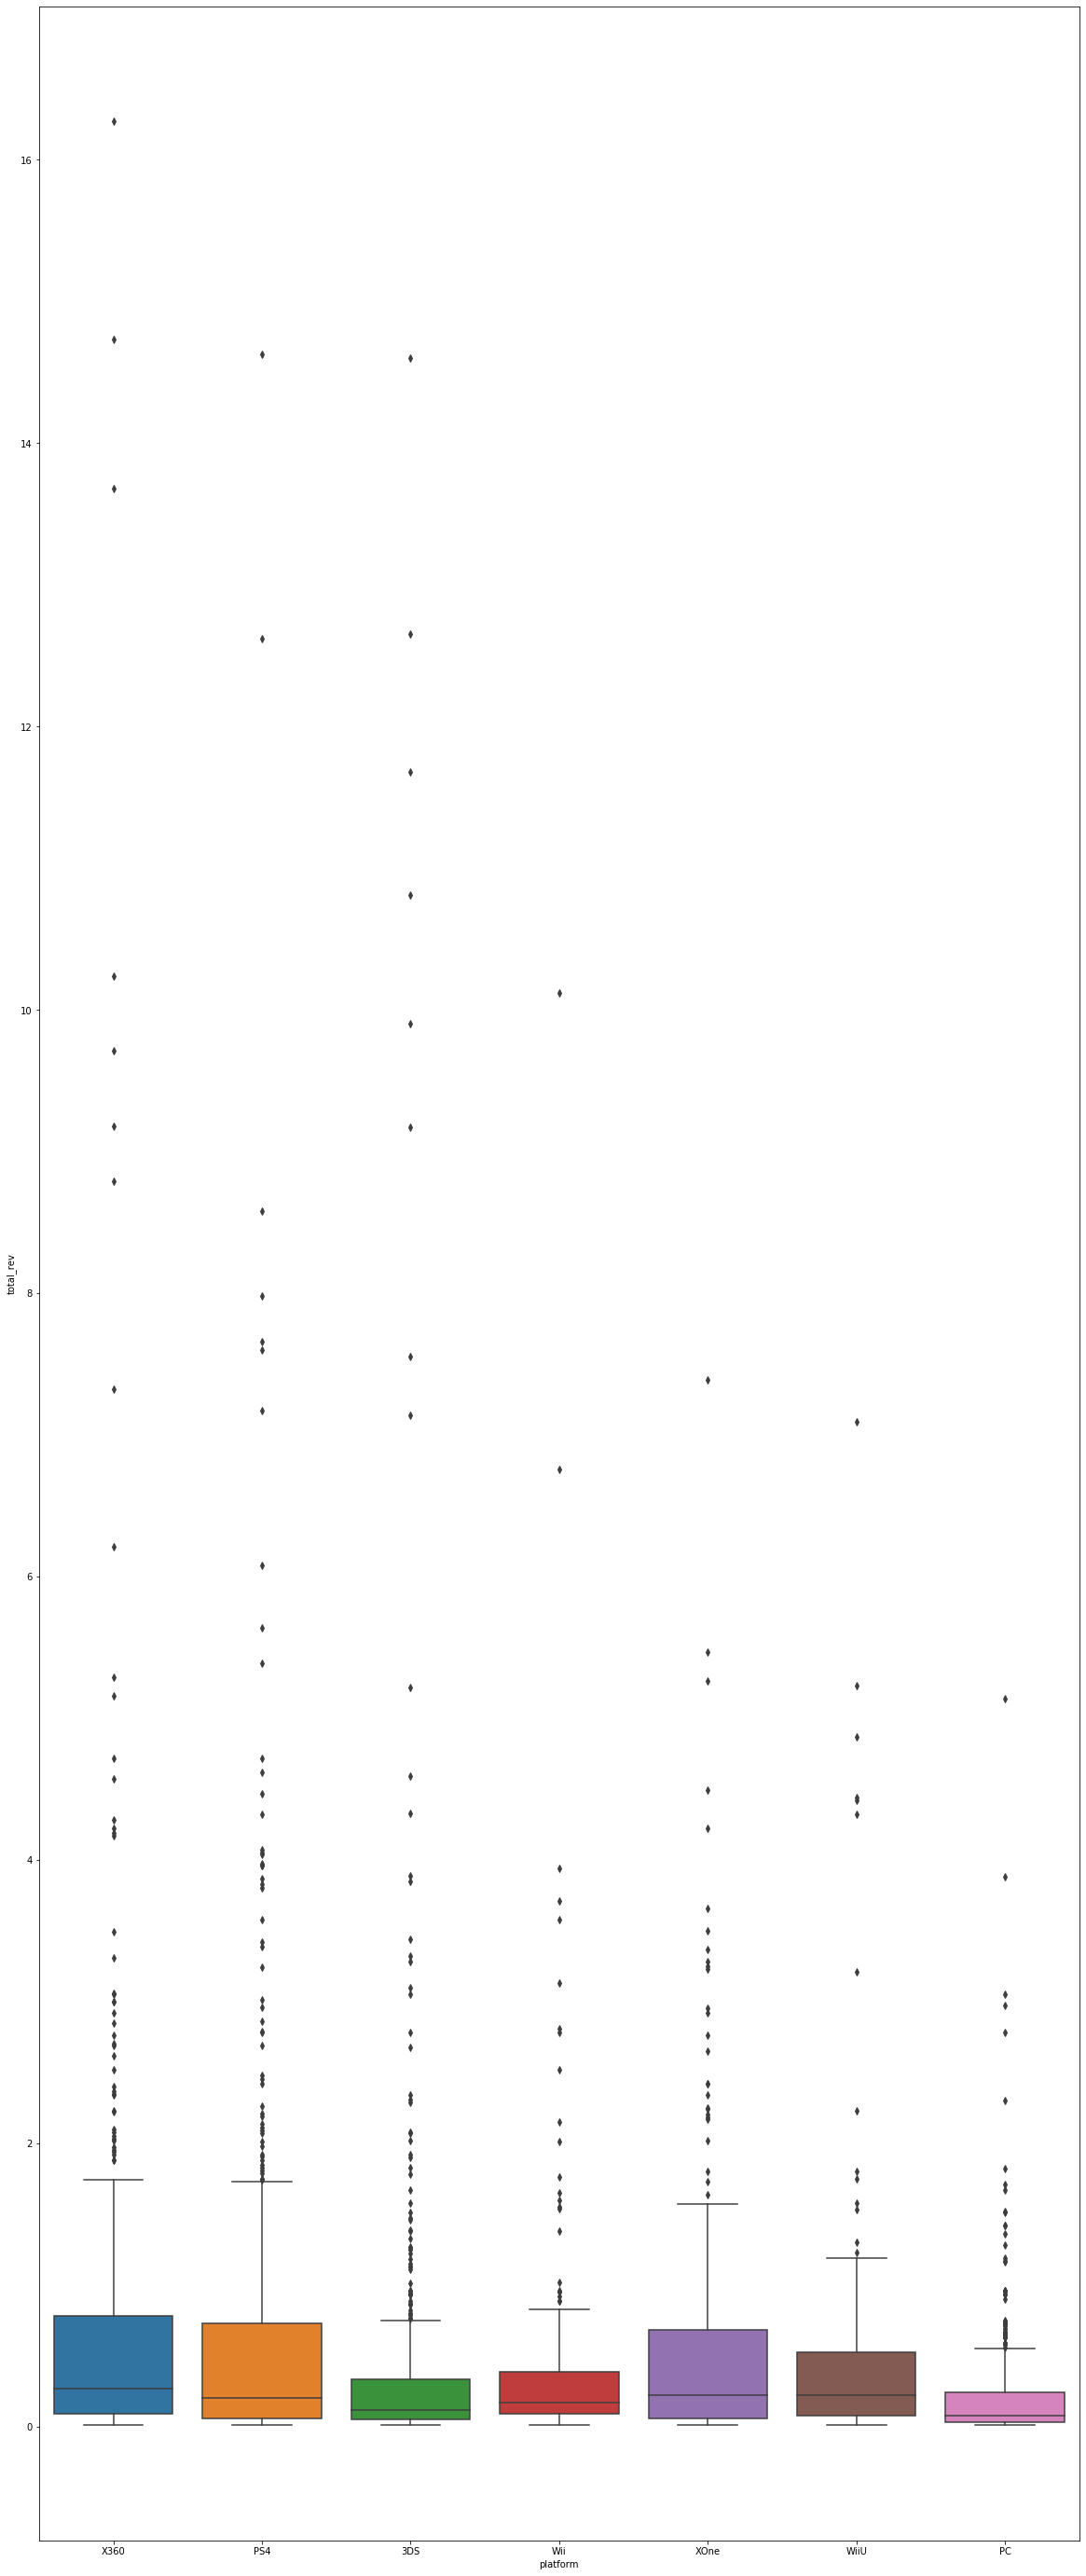

In [271]:
#Построим график «ящик с усами» по глобальным продажам актуальных платформ
%matplotlib inline 
plt.figure(figsize=(20,50))
sns.boxplot( x='platform', y='total_rev', data=good_data)

In [272]:
mean_and_median_pl=pd.DataFrame(columns=['platform','mean',"median"]) #для каждой актуальной платформы расчитаем среднюю и медианную выручку с 2010 года
for k in platforms:
    for m in platforms: #в цикле сделаем расчеты
        m=good_data.query("platform==@k")
        mean_sales_platform=m['total_rev'].mean()
        median_sales_platform=m['total_rev'].median()
        mean_and_median_pl.loc[k]=[k,mean_sales_platform, median_sales_platform]  #соберем данные в новый датафрейм

In [273]:
mean_and_median_pl=mean_and_median_pl.reset_index(drop=True)
mean_and_median_pl

,platform,mean,median
0,X360,0.763815,0.27
1,Wii,0.482335,0.17
2,PS4,0.801378,0.20
3,3DS,0.503535,0.12
4,PC,0.251105,0.08
5,XOne,0.645020,0.22
6,WiiU,0.559116,0.22


# Вывод:
Для потенциально прибыльных платформ построили график «ящик с усами» по глобальным продажам.
Разница в продажах велика. Выручка у X360 больше в 3 раза чем у  PC. У платформ PS4, XOne выручка больше в 2 раза чем у PC. У Wii, 3DS значения выручки почти на одном уровне. То же самое в средних продажах на разных платформах. 

In [274]:
#проверим взаимозависимость выручки и оценок критиков и юзеров для популярной платформы
PS4=good_data.query('platform=="PS4" and critic_score>0 and user_score>0') 

In [275]:
#пересчитаем total_rev в доллары для лучшей визуализации
PS4['total_rev']=PS4['total_rev']*1000

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


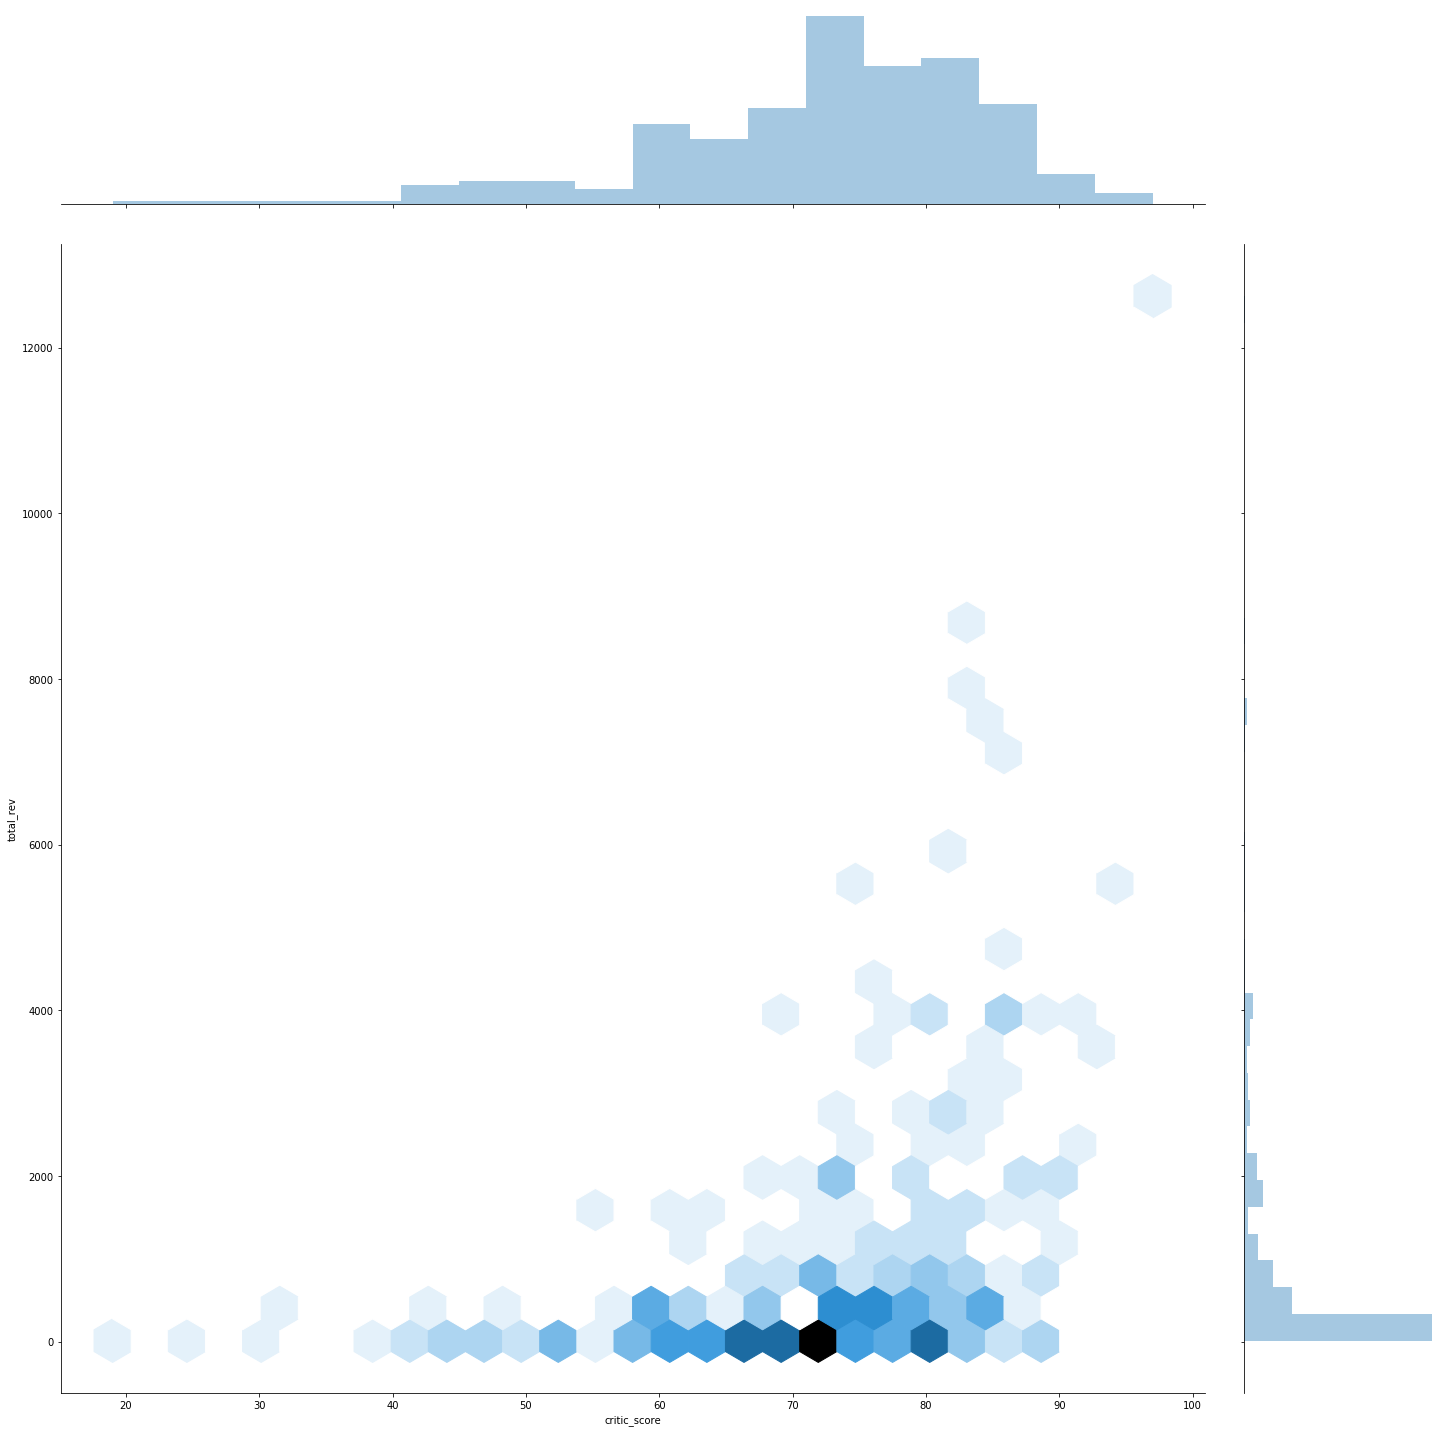

In [276]:
g = sns.jointplot("critic_score","total_rev" , data=PS4,  height=20, ratio=5, kind="hex")

По оси Y располагаем зависимую переменную.

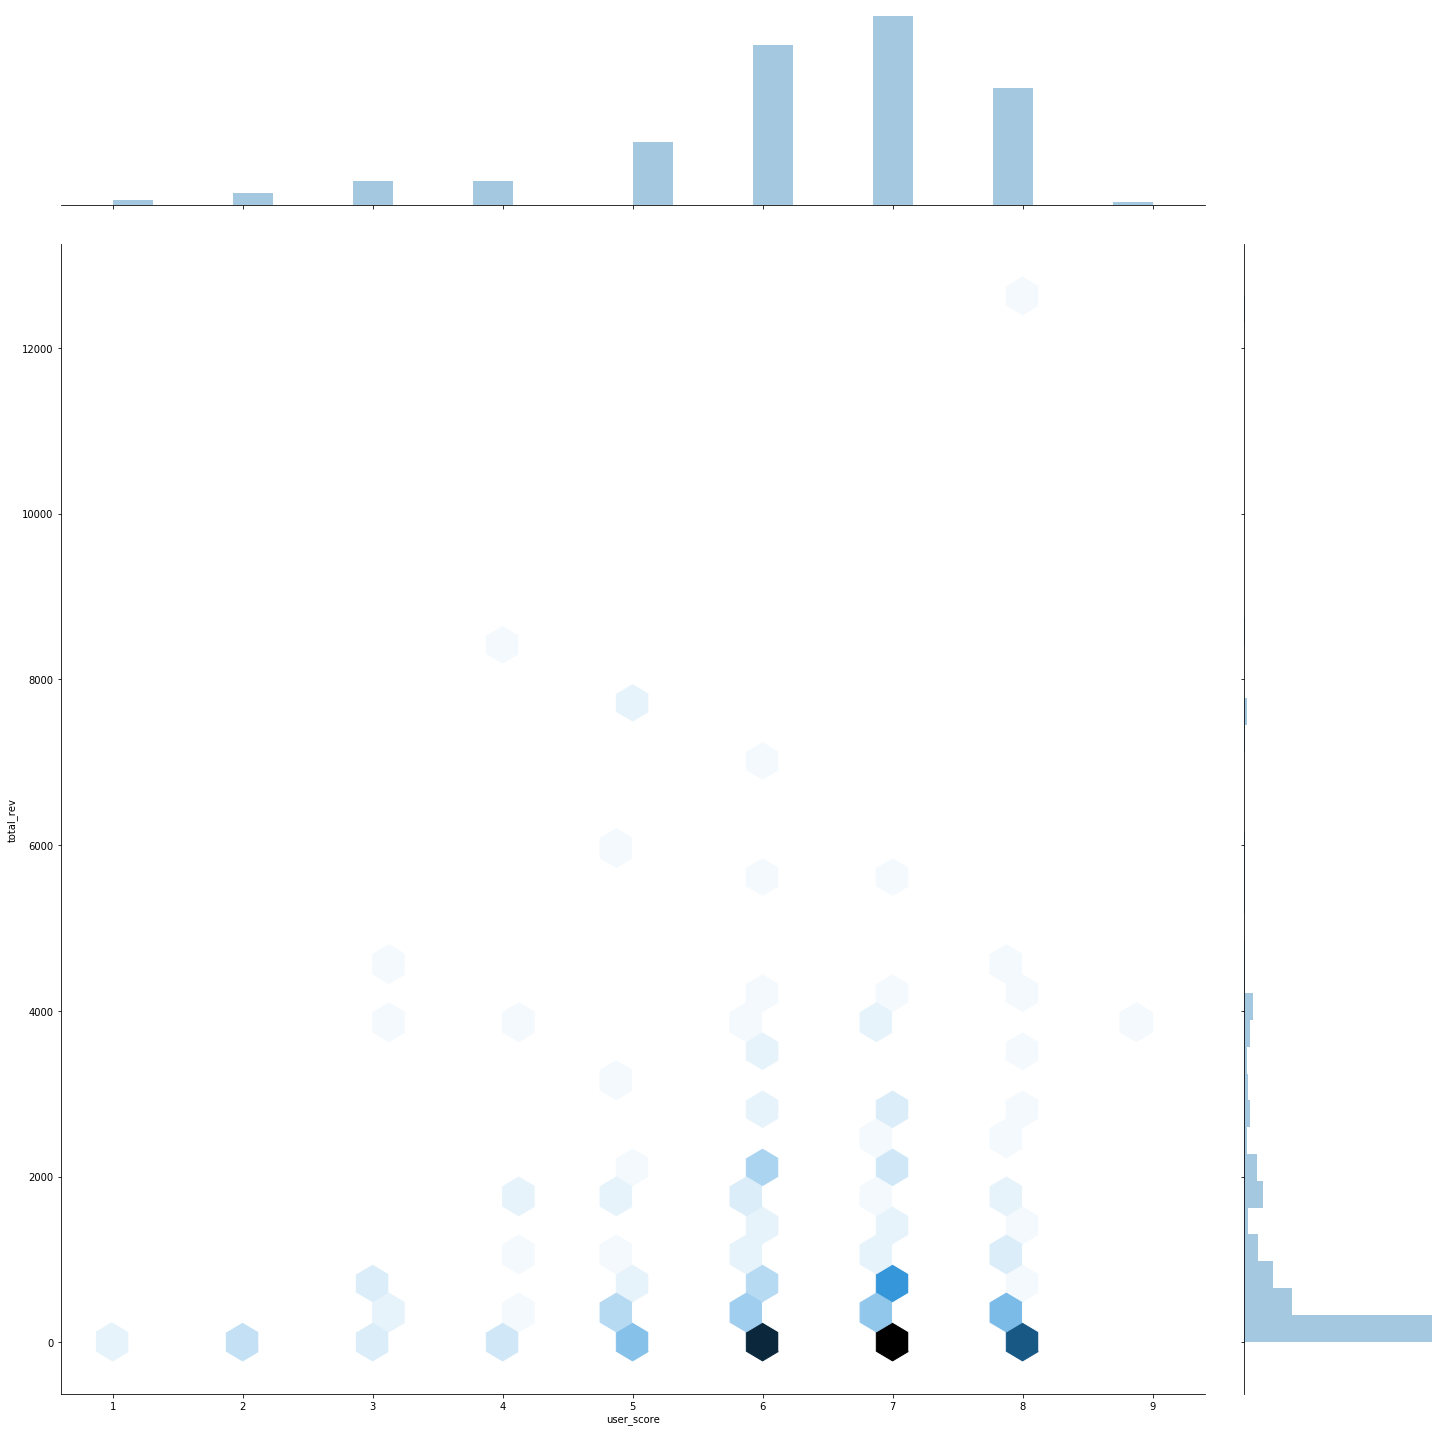

In [277]:
h = sns.jointplot("user_score", "total_rev", data=PS4, height=20, ratio=5, kind="hex")

In [278]:
#проверим взаимозависимость выручки и оценок критиков и юзеров для непопулярной платформы
PC=good_data.query('platform=="PC" and critic_score>0 and user_score>0') 

In [279]:
#пересчитаем total_rev в доллары для лучшей визуализации
PC['total_rev']=PC['total_rev']*1000

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


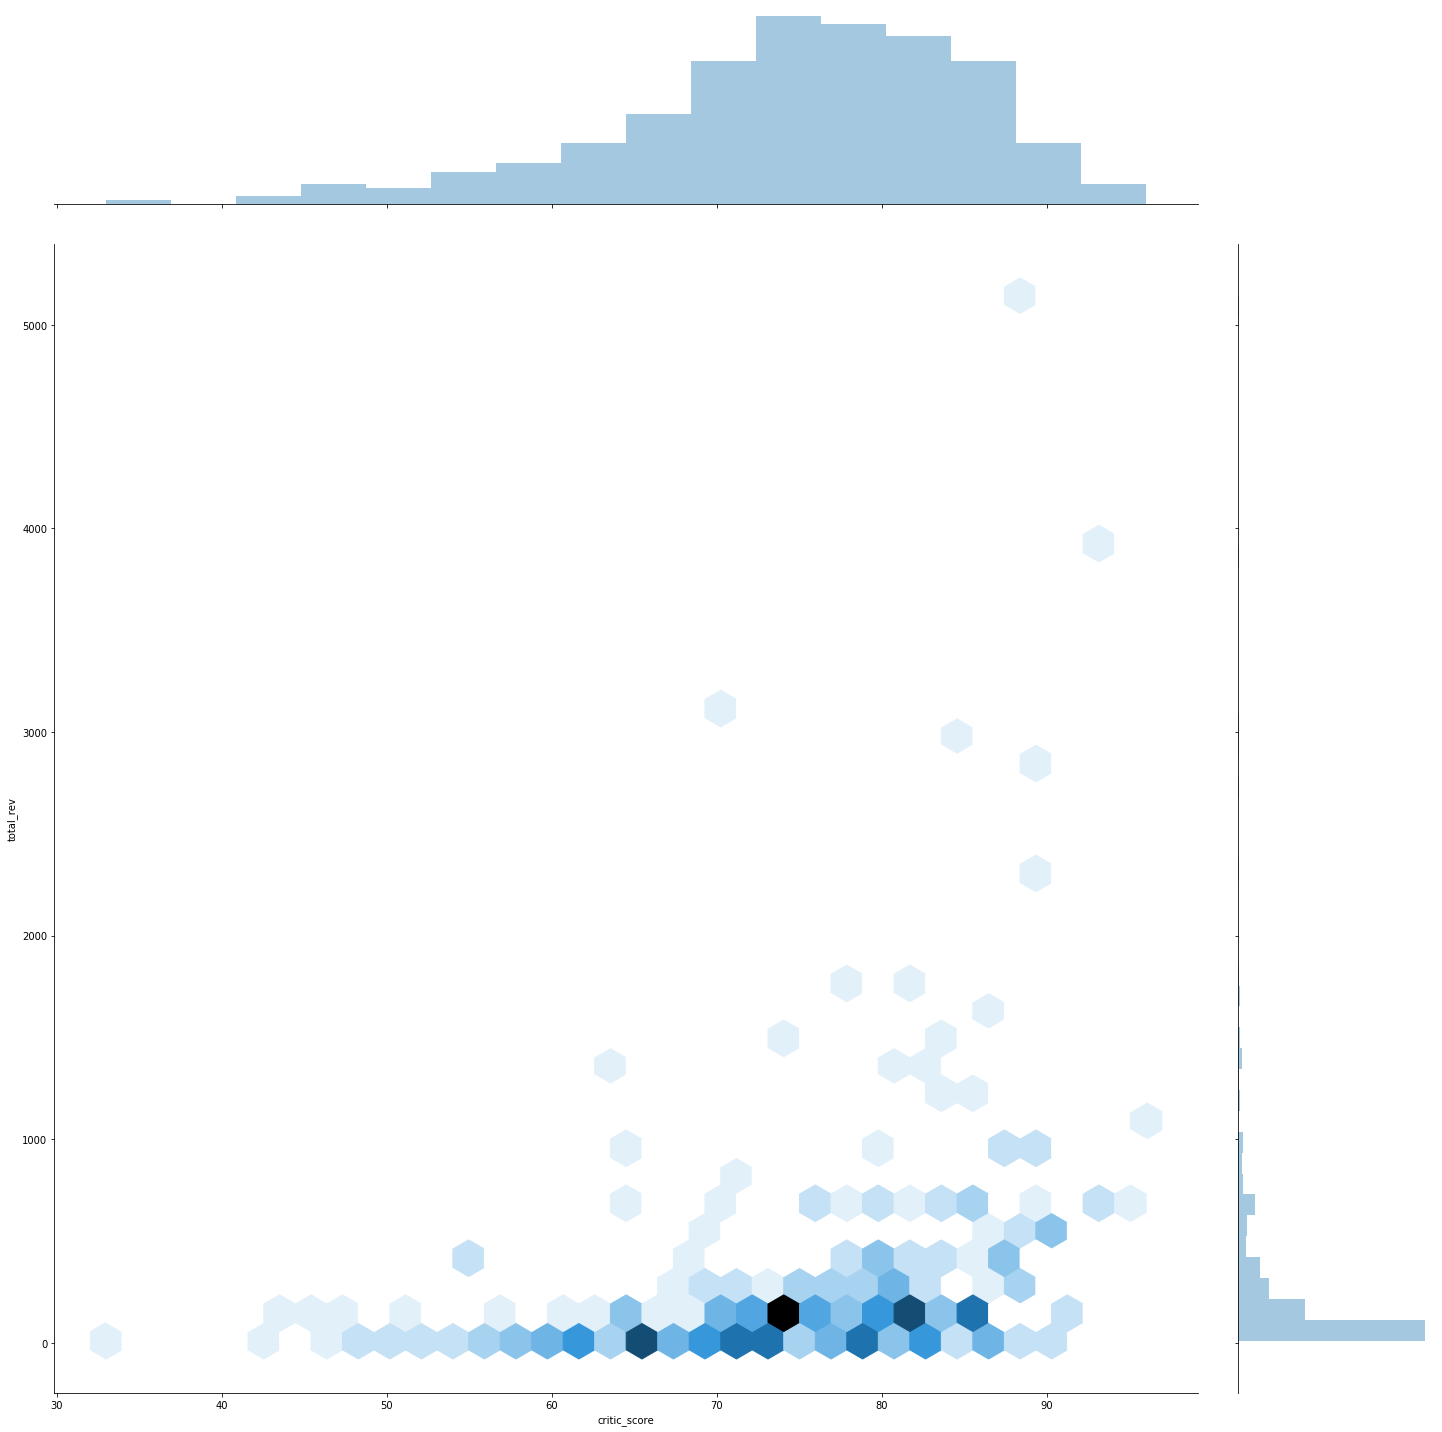

In [280]:
a = sns.jointplot("critic_score","total_rev" , data=PC,  height=20, ratio=5, kind="hex")

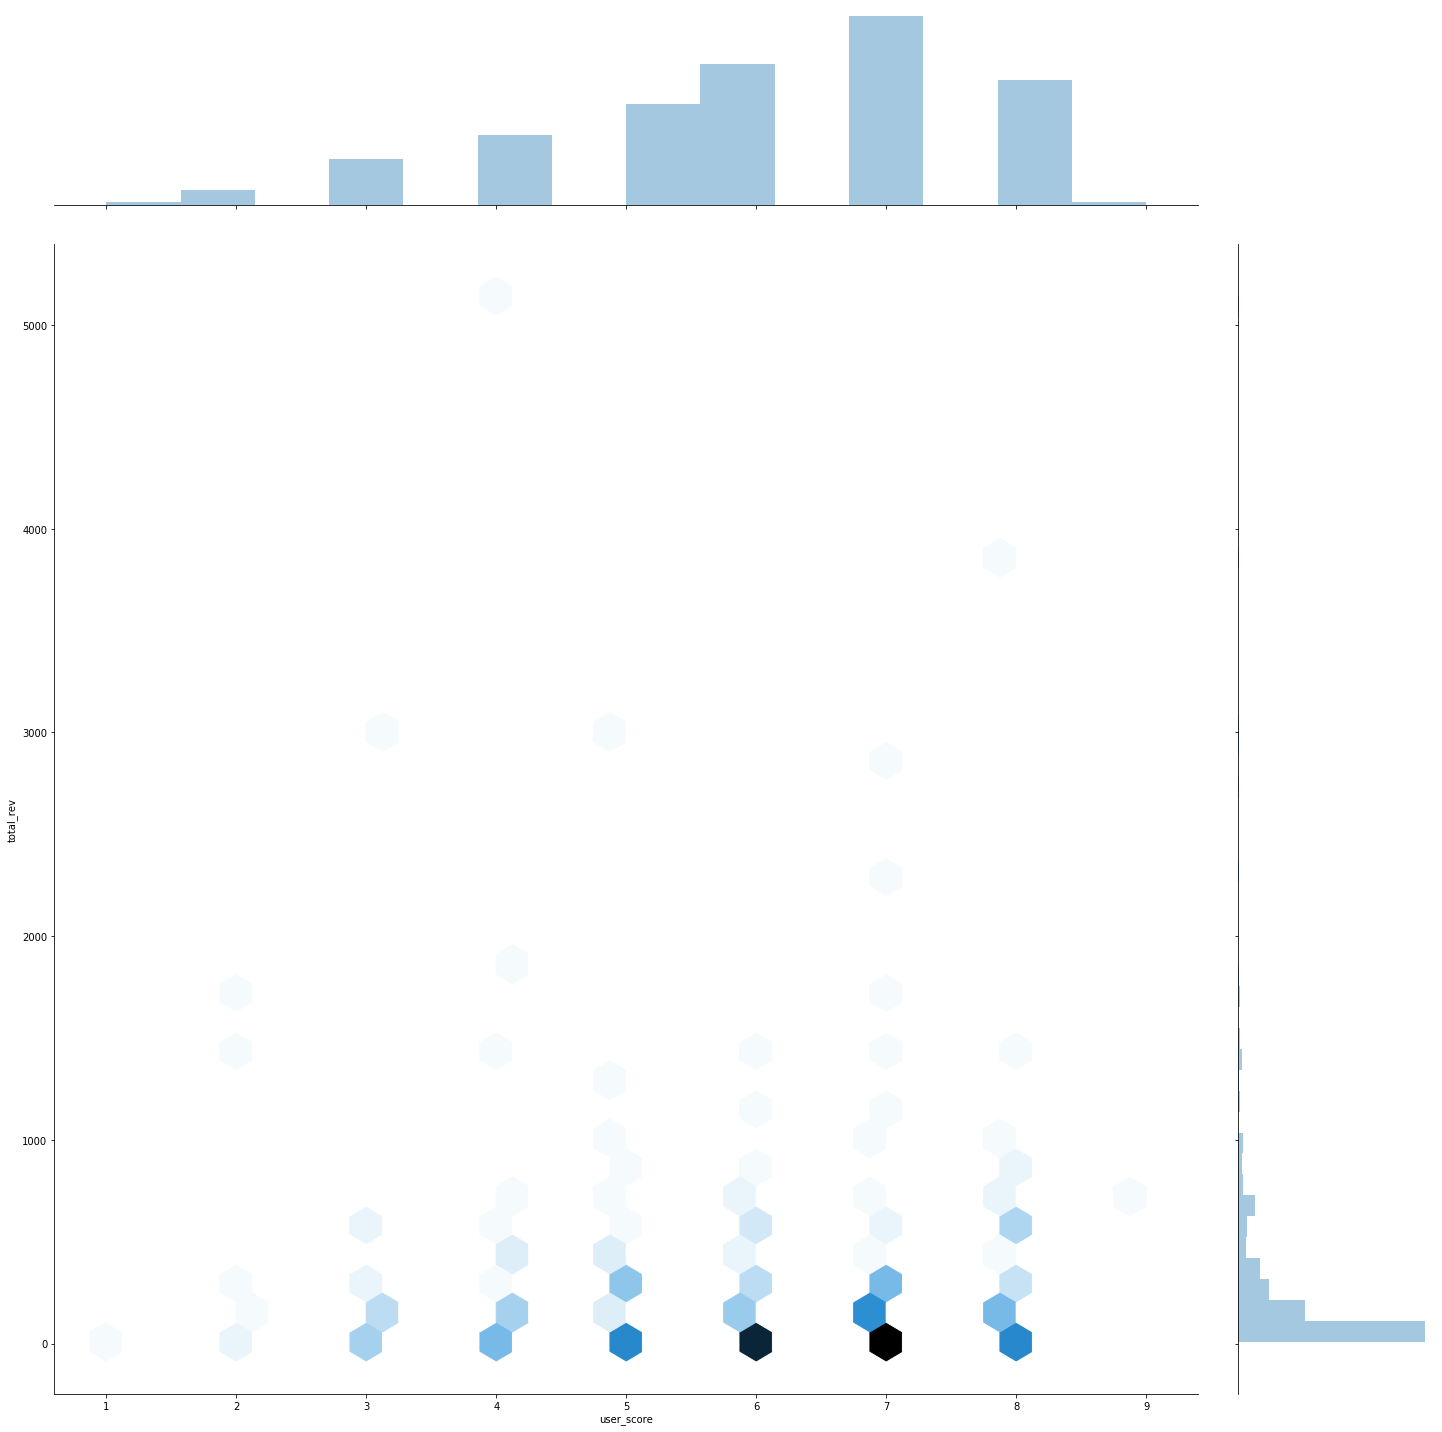

In [281]:
b = sns.jointplot("user_score","total_rev", data=PC, height=20, ratio=5, kind="hex")

In [282]:
corr_critic_and_user=pd.DataFrame(columns=['platform','critic',"user"])
for k in platforms:
    for m in platforms: 
        m=good_data.query("platform==@k")
        corr_critic=m['total_rev'].corr(m['critic_score'])
        corr_user=m['total_rev'].corr(m['user_score'])
        corr_critic_and_user.loc[k]=[k,corr_critic, corr_user] 

In [283]:
corr_critic_and_user=corr_critic_and_user.reset_index(drop=True)
corr_critic_and_user

,platform,critic,user
0,X360,0.315661,0.172612
1,Wii,0.332826,0.369915
2,PS4,0.227550,0.112579
3,3DS,0.167021,0.153138
4,PC,0.256742,0.117383
5,XOne,0.274839,0.109823
6,WiiU,0.298124,0.281393


# Вывод: 
Распределение зависимости у популярной и непопулярной платформы между выручкой и оценками критиков и юзеров совпадают. Можно утверждать, что зависимость между выручкой и оценками критиков  выше, чем зависимость между выручкой и оценками юзеров. 

In [284]:
#Посмотрим на общее распределение игр по жанрам
genre=good_data.groupby(['genre']).sum().sort_values(by='total_rev', ascending=False) 
#сгруппируем по жанру, отсортируем по убыванию
genre['ratio']=genre['total_rev']/genre['total_rev'].sum() #дополним график столбцом с долей жанра
genre[['total_rev','ratio']]

,total_rev,ratio
genre,,
Action,366.23,0.264132
Shooter,298.56,0.215327
Role-Playing,173.79,0.125341
Sports,166.05,0.119759
Misc,111.60,0.080488
Platform,72.15,0.052036
Racing,66.12,0.047687
Simulation,44.56,0.032138
Fighting,40.81,0.029433


# Вывод:
Самая большая выручка у следующих жанров: action 26%, shooter 21%, role-playing 12%, sports 12%.
Самые низкие продажи у puzzle, strategy and adventure 1%.

# Шаг 4. Составим портрет пользователя каждого региона

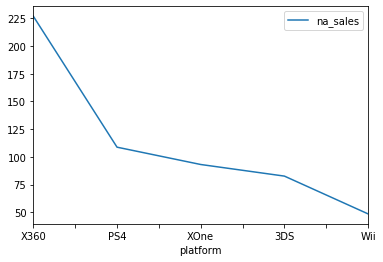

In [285]:
#Определим для пользователя каждого региона (NA, EU, JP)
# Самые популярные платформы (топ-5) В северной Америке
na_platform=good_data.groupby(['platform']).sum().sort_values(by='na_sales', ascending=False)       
na_platform['ratio']=na_platform['na_sales']/na_platform['total_rev']
na_platform_5=na_platform[['na_sales','total_rev', 'ratio']].head()
na_platform_5=na_platform_5.reset_index()
na_platform_5.plot(x='platform',y='na_sales')

Опишем различия в долях продаж.

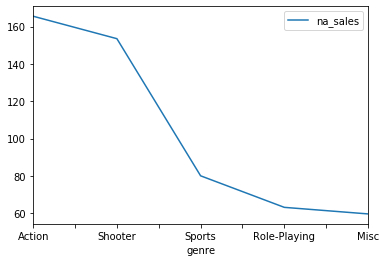

In [286]:
#Самые популярные жанры (топ-5) В Северной Америке
na_genre=good_data.groupby(['genre']).sum().sort_values(by='na_sales', ascending=False)   
na_genre_5=na_genre[['na_sales','total_rev']].head()
na_genre_5=na_genre_5.reset_index()
na_genre_5.plot(x='genre',y='na_sales')

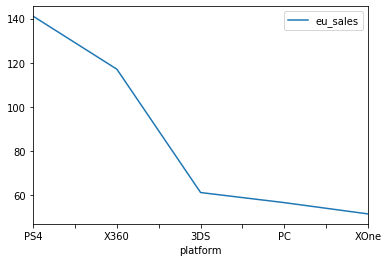

In [287]:
#В Европе топ-5 платформ
eu_platform=good_data.groupby(['platform']).sum().sort_values(by='eu_sales', ascending=False)       
eu_platform['ratio']=eu_platform['eu_sales']/eu_platform['total_rev']
eu_platform_5=eu_platform[['eu_sales','total_rev', 'ratio']].head()
eu_platform_5=eu_platform_5.reset_index()
eu_platform_5.plot(x='platform',y='eu_sales')

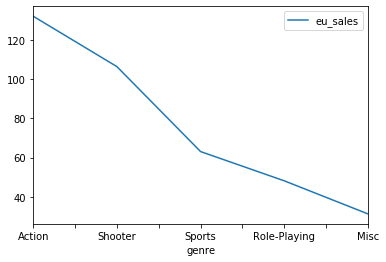

In [288]:
#В Европе топ-5 жанров
eu_genre=good_data.groupby(['genre']).sum().sort_values(by='eu_sales', ascending=False)   
eu_genre_5=eu_genre[['eu_sales','total_rev']].head()
eu_genre_5=eu_genre_5.reset_index()
eu_genre_5.plot(x='genre',y='eu_sales')

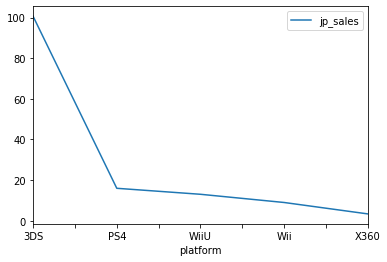

In [289]:
#В Японии топ-5 платформ
jp_platform=good_data.groupby(['platform']).sum().sort_values(by='jp_sales', ascending=False)       
jp_platform['ratio']=jp_platform['jp_sales']/jp_platform['total_rev']
jp_platform_5=jp_platform[['jp_sales','total_rev', 'ratio']].head()
jp_platform_5=jp_platform_5.reset_index()
jp_platform_5.plot(x='platform',y='jp_sales')

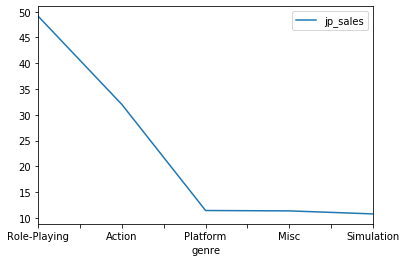

In [290]:
#В Японии топ-5 жанров
jp_genre=good_data.groupby(['genre']).sum().sort_values(by='jp_sales', ascending=False)   
jp_genre_5=jp_genre[['jp_sales','total_rev']].head()
jp_genre_5=jp_genre_5.reset_index()
jp_genre_5.plot(x='genre',y='jp_sales')

# Вывод:
В Америке И Европе наибольшей популярностью пользуются платформы PS4 и X360. PS4 занимает 2е место в Японии. На первом месте в Японии находится 3DS, эта же платформа на последнем месте в Европе. XOne занимает 3е место в Америке и последнее в Европе. WiiU и Wii занимает 3 и 4 место в Японии, но в Америке занимает последнее место в 5ке, а в Европе не вошли в 5ку.
Жанрам action принадлежит 26% рынка, shooter 21%, role-playing 12%, sports 12%. В Америке и Европе одинаково популярны action,  shooter,sports, а вот в Японии первое место занимает role-playing, за ним следует action

In [291]:
#Влияет ли рейтинг ESRB на продажи в отдельном регионе?
rating=good_data.groupby(['rating']).sum()
rating

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_rev
rating,,,,,,,,
-1,1586651,98.51,89.47,80.58,23.71,3568,366,292.27
E,867663,127.66,104.10,31.04,26.29,20402,1903,289.09
E10+,668371,99.20,61.10,10.09,17.32,17197,1697,187.71
M,879881,225.36,169.77,9.21,49.47,29986,2659,453.81
RP,2011,0.00,0.03,0.00,0.01,63,6,0.04
T,791198,77.12,58.01,11.33,17.16,22403,2196,163.62


In [292]:
rating['na_ratio']=rating['na_sales']/rating['total_rev'].sum() #посчитаем долю каждой категории рейтинга ESRB в каждом регионе 
rating['eu_ratio']=rating['eu_sales']/rating['total_rev'].sum()
rating['jp_ratio']=rating['jp_sales']/rating['total_rev'].sum()
rating['other_ratio']=rating['other_sales']/rating['total_rev'].sum()
rating=rating.reset_index()
rating

,rating,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_rev,na_ratio,eu_ratio,jp_ratio,other_ratio
0,-1,1586651,98.51,89.47,80.58,23.71,3568,366,292.27,0.071047,0.064528,0.058116,0.017100
1,E,867663,127.66,104.10,31.04,26.29,20402,1903,289.09,0.092071,0.075079,0.022387,0.018961
2,E10+,668371,99.20,61.10,10.09,17.32,17197,1697,187.71,0.071545,0.044067,0.007277,0.012492
3,M,879881,225.36,169.77,9.21,49.47,29986,2659,453.81,0.162534,0.122441,0.006642,0.035679
4,RP,2011,0.00,0.03,0.00,0.01,63,6,0.04,0.000000,0.000022,0.000000,0.000007
5,T,791198,77.12,58.01,11.33,17.16,22403,2196,163.62,0.055620,0.041838,0.008171,0.012376


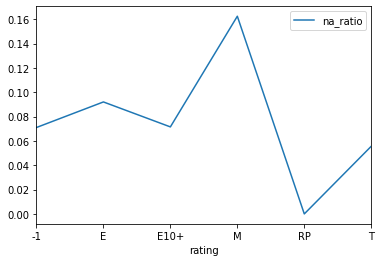

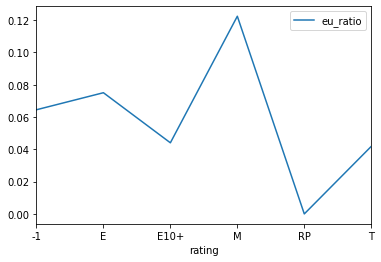

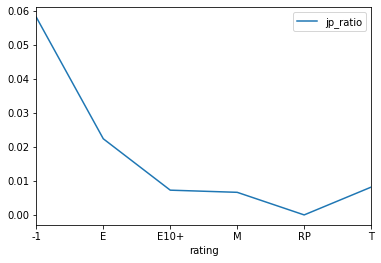

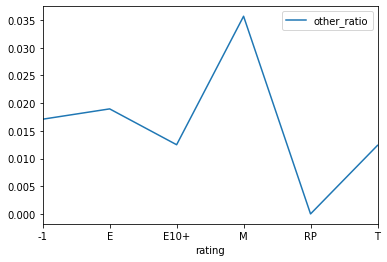

In [293]:
#построим графики, характеризующие популярность игр по разным категориям рейтинга ESRB в разных регионах 
rating.plot(x='rating',y='na_ratio') 
rating.plot(x='rating',y='eu_ratio')
rating.plot(x='rating',y='jp_ratio')
rating.plot(x='rating',y='other_ratio')
plt.show()

Категория "-1"- это Nan, которые мы обрабатывали в начале проекта. К ним же можно было добавить данные по категории «RP» («Rating Pending») — «Рейтинг ожидается». 
Категория «M» («Mature») — Для взрослых лидирует во всех регионах кроме Японии. В Японии наиболее популярна категория «E» («Everyone») — «Для всех».
Второе место по популярности в регионах NA, EU и other занимает категория «E» («Everyone») — «Для всех».
Третье место с незначительным опережением занимает категория «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше». Четвертое «T» («Teen») — «Подросткам».

# Шаг 5. Проверим гипотезы

In [294]:
#Н0 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
#H1 Средние пользовательские рейтинги платформ Xbox One и PC различаются    
user_xone_query = good_data.query('platform=="XOne"')
user_mean_xone=user_xone_query['user_score']

user_pc_query = good_data.query('platform=="PC"')
user_mean_pc=user_pc_query['user_score']
    
alpha = .05 # критический уровень статистической значимости
    
results = st.ttest_ind(
    user_mean_xone, 
    user_mean_pc)
    
print('p-значение: ', results.pvalue)
    
if (results.pvalue < alpha): #сравним получившееся p-значение с заданным уровнем статистической значимости)
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.3474389138178037
Не получилось отвергнуть нулевую гипотезу


Вывод: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

За нулевую гипотезу принимаем положительное предположение о том, что Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. За альтернативную гипотезу берем: Средние пользовательские рейтинги платформ Xbox One и PC различаются. Для проверки использовали сравнение p-значения с заданным уровнем статистической значимости. За уровень значимости используется значение 0.05, такую вероятность ошибки считаем допустимой.

In [295]:
#Н0 Средние пользовательские рейтинги жанров Action и Sports одинаковые
#H1 Средние пользовательские рейтинги жанров Action и Sports разные
genre_action_query = good_data.query('genre=="Action"')
genre_action_query_mean=genre_action_query['user_score']

genre_sports_query = good_data.query('genre=="Sports"')
genre_sports_query_mean=genre_sports_query['user_score']

    
alpha = .05 # критический уровень статистической значимости
    
results = st.ttest_ind(
    genre_action_query_mean, 
    genre_sports_query_mean)
    
print('p-значение: ', results.pvalue)
    
if (results.pvalue < alpha): #сравним получившееся p-значение с заданным уровнем статистической значимости)
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.9099274548952493
Не получилось отвергнуть нулевую гипотезу


Вывод: Средние пользовательские рейтинги жанров Action и Sports одинаковые.

За нулевую гипотезу принимаем положительное предположение о том, что Средние пользовательские рейтинги жанров Action и Sports одинаковые. За альтернативную гипотезу берем: Средние пользовательские рейтинги жанров Action и Sports разные. Для проверки использовали сравнение p-значения с заданным уровнем статистической значимости. За уровень значимости используется значение 0.05, такую вероятность ошибки считаем допустимой.


# Шаг 6. Общий вывод

    В данном проекте нашей задачей было выявить определяющие успешность игры закономерности для планирования рекламной кампании на 2017-й год. Мы провели предобработку данных: обработали пропуски, заменили тип данных. 
    Далее мы выделили 20 топ-платформ по прибыли, построили для них графики распределения по годам и определили, что максимальная выручка у платформ: PS2 1233.56 млн. $, X360 961.24 млн. $, PS3 931.34 млн.$, Wii 891.18 млн.$, DS 802.78 млн.$, PS 727.58 млн. $. Некоторые платформы из перечисленных уже не актуальны и из данных за 37 лет нам нужны только последние 10, так как в среднем жизненный цикл платформы составляет 10 лет.  
    Платформы X360, PS3, Wii, PS4, PSP, 3DS, PC, XOne, WiiU актуальны и имеют выручки в 2010-2016 годах. К потенциально прибыльным платформам отнесем: X360, Wii, PS4,3DS, PC, XOne, WiiU. 
   Для потенциально прибыльных платформ был построен график «ящик с усами» по глобальным продажам.
Разница в продажах велика. Выручка у X360 больше в 3 раза чем у  PC. У платформ PS4, XOne выручка больше в 2 раза чем у PC. У Wii, 3DS значения выручки почти на одном уровне. То же самое в средних продажах на разных платформах.
   Распределение зависимости у популярной и непопулярной платформы между выручкой и оценками критиков и юзеров совпадают. Можно утверждать, что зависимость между выручкой и оценками критиков  выше, чем зависимость между выручкой и оценками юзеров. 
   Самая большая выручка у следующих жанров: action 26%, shooter 21%, role-playing 12%, sports 12%.
   Самые низкие продажи у puzzle, strategy and adventure 1%.
   В Америке И Европе наибольшей популярностью пользуются платформы PS4 и X360. PS4 занимает 2е место в Японии. На первом месте в Японии находится 3DS, эта же платформа на последнем месте в Европе. XOne занимает 3е место в Америке и последнее в Европе. WiiU и Wii занимает 3 и 4 место в Японии, но в Америке занимает последнее место в 5ке, а в Европе не вошли в 5ку.
Жанрам action принадлежит 26% рынка, shooter 21%, role-playing 12%, sports 12%. В Америке и Европе одинаково популярны action,  shooter, sports, а вот в Японии первое место занимает role-playing, за ним следует action.
   По поводу влияния рейтинга ESRB на продажи в отдельном регионе можн осказать следующиее:
    Категория «M» («Mature») — Для взрослых лидирует во всех регионах кроме Японии. В Японии наиболее популярна категория «E» («Everyone») — «Для всех». Второе место по популярности в регионах NA, EU и other занимает категория «E» («Everyone») — «Для всех». Третье место с незначительным опережением занимает категория «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше». Четвертое «T» («Teen») — «Подросткам». Категория "-1"- это Nan, которые мы обрабатывали в начале проекта. К ним же можно было добавить данные по категории «RP» («Rating Pending») — «Рейтинг ожидается».
    При проверке гипоз были сделаны следующие выводы: 
    
    Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

За нулевую гипотезу принимаем положительное предположение о том, что Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. За альтернативную гипотезу берем: Средние пользовательские рейтинги платформ Xbox One и PC различаются. Для проверки использовали сравнение p-значения с заданным уровнем статистической значимости. За уровень значимости используется значение 0.05, такую вероятность ошибки считаем допустимой.

    Средние пользовательские рейтинги жанров Action и Sports одинаковые.

За нулевую гипотезу принимаем положительное предположение о том, что Средние пользовательские рейтинги жанров Action и Sports одинаковые. За альтернативную гипотезу берем: Средние пользовательские рейтинги жанров Action и Sports разные. 